# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

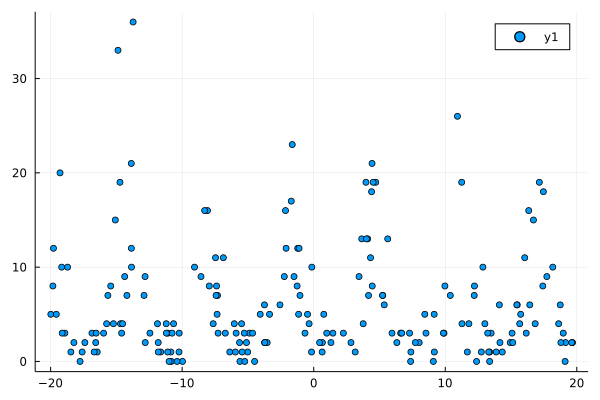

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -553.6211597180755
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.200766 seconds (6.81 M allocations: 414.388 MiB, 2.27% gc time, 97.58% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.20366114745525918, 0.20364741853924753, 0.24311645839790919, 0.49675587602813664, 0.1852895916119031, 0.29463184767503453, 0.27885023004822296, 0.530309353882615, 0.5048943980831566, 0.2114891237081016  …  0.5751773526400967, 0.2006648544541961, 0.2046659068588418, 0.4952635830658676, 0.464470686596312, 0.3763527687798933, 0.6582984087952832, 0.23264941506873116, 0.5465729717396438, 0.36699678137962505], θ = [5.979346729632378, 5.979349502537652, 6.965724300507845, 2.449828045795915, 7.9771901529252665, 2.9784847685623728, 3.4774957149169374, 6.351833623639406, 11.75141657683168, 6.47588039878159  …  3.893253760280444, 4.484960661147512, 6.477405234927847, 2.4501218319516886, 2.947205407198381, 2.4709034321274648, 2.4134654428270697, 8.959624210170054, 20.00444803201133, 3.95570100687106]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTupl

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -723.2906284164218
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.261975 seconds (4.31 M allocations: 301.049 MiB, 2.88% gc time, 95.37% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 13.446723607803014) infered by Analytic Variational Inference , (local_vars = (c = [0.3053391343189378, 0.13410075761860762, 0.19089652780001634, 0.6958292017401352, 0.2596135141295556, 0.4557862616166238, 0.4522296799157512, 0.5271828485565832, 0.49152822319619344, 0.23867568108212894  …  0.7574125318388307, 0.3177917180482122, 0.3100390523780945, 0.6883181448396203, 0.6587591188363978, 0.5706253421130121, 0.8325907024210619, 0.17876274932847833, 0.5308890213720185, 0.5594033981872888], θ = [7.205740427609338, 6.83811683672857, 7.851629897689574, 4.279731298104439, 9.126411211695228, 4.453703817955547, 4.956807845899094, 6.3635490664784164, 11.83731187705331, 7.54508293208056  …  5.747394328037219, 5.748362889628862, 7.70997303931663, 4.274840621330406, 4.70713475513855, 4.13631648369459, 4.36556283279093, 9.832253678728863, 20.043396893624966, 5.576806541572213], γ = [7.523274840773094, 6.696722524273902, 6.7509183650687525

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

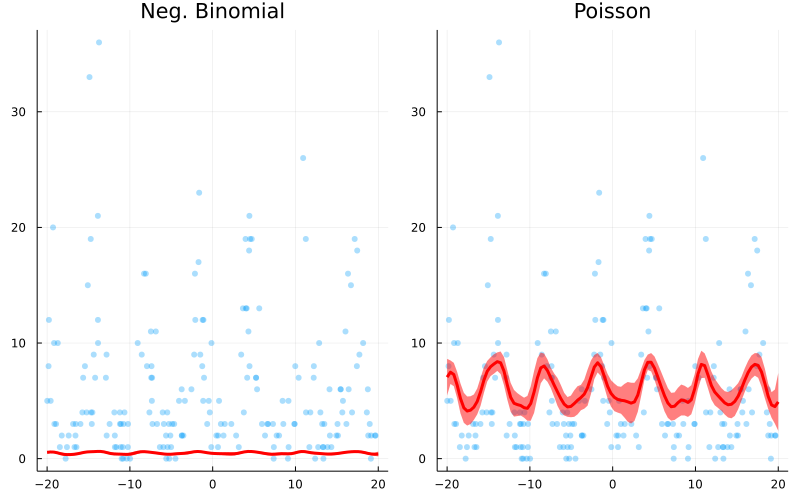

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*